In [9]:
import pandas as pd
import numpy as np

# Preparation

In [10]:
train = pd.read_csv('train.csv')

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [66]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [13]:
x = train.drop('exam score', axis =1)
y = train['exam score']

In [14]:
x = x.drop('Roll no', axis = 1)

In [15]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype = 'int',drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [16]:
train.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

In [17]:
def preprocess_inputs(df):
 # One-hot encode categorical features
    for column in ['test preparation ', 'gender', 'parental level of education', 'lunch', 'Section']:
        df = onehot_encode(df, column)
    return df

In [18]:
X = preprocess_inputs(x)

In [19]:
df = X[['practical score','viva score']]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(df)

In [20]:
scaled = pd.DataFrame(x, columns =['practical score','viva score'])

In [21]:
X  = X.drop(['practical score','viva score'], axis = 1)

In [22]:
X.reset_index(drop=True, inplace=True)
scaled.reset_index(drop=True, inplace=True)
X = pd.concat([X, scaled], axis=1)

In [23]:
X.head()

,test preparation _none,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,Section_Section B,Section_Section C,Section_Section D,Section_Section E,practical score,viva score
0,1,1,0,0,0,1,0,1,0,0,0,0,0.141837,0.186257
1,1,1,0,0,1,0,0,0,0,1,0,0,-0.843083,-1.161974
2,1,1,0,0,1,0,0,0,0,0,0,1,-0.777422,-1.729650
3,1,0,0,0,0,1,0,0,0,1,0,0,-2.156310,-1.658690
4,1,0,0,1,0,0,0,1,0,1,0,0,1.258080,1.534487


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [98]:
def evaluate_models(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return "\n\nmean_absolute_error: {} \nmean_squared_error: {} \nroot_mean_squared_error: {} \nr2_square: {} " . format(
        mae, mse, rmse, r2_square)

In [99]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Linear Regression

In [28]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred_lin = linear.predict(X_test)  

In [30]:
print(evaluate_model(y_test, y_pred_lin))



mean_absolute_error: 12.0702370311641 
mean_squared_error: 222.65558108070383 
root_mean_squared_error: 14.921648068517895 
r2_square: 0.001206462506292194 


# Logistic Regression

In [31]:
logis = LogisticRegression(max_iter=1000)

In [32]:
logis.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [33]:
y_pred_log = logis.predict(X_test) 

In [34]:
logis.score(X_train, y_train)*100, logis.score(X_test,y_test)*100

(3.614907411726293, 3.3333333333333335)

In [35]:
print(evaluate_model(y_test, y_pred_log))



mean_absolute_error: 12.656628787878788 
mean_squared_error: 251.3001893939394 
root_mean_squared_error: 15.852450580081914 
r2_square: -0.1272881816810827 


In [36]:
dtr = DecisionTreeRegressor()

In [37]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
y_pred_dtr = dtr.predict(X_test)
print(evaluate_model(y_test, y_pred_dtr))



mean_absolute_error: 16.46451231060606 
mean_squared_error: 450.0397457649411 
root_mean_squared_error: 21.214140231575286 
r2_square: -1.0187986643030058 


In [39]:
rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred_rgr = rgr.predict(X_test)
print(evaluate_model(y_test, y_pred_rgr))



mean_absolute_error: 12.308248646981177 
mean_squared_error: 239.55556379717436 
root_mean_squared_error: 15.477582621235603 
r2_square: -0.0746038694828619 


In [41]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [42]:
y_pred_gbr = gbr.predict(X_test)
print(evaluate_model(y_test, y_pred_gbr))



mean_absolute_error: 12.061094181960911 
mean_squared_error: 222.6952088417227 
root_mean_squared_error: 14.92297587084167 
r2_square: 0.001028699382552345 


In [43]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 
import warnings

In [44]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [45]:
y_pred_svr = svr.predict(X_test)
print(evaluate_model(y_test, y_pred_svr))



mean_absolute_error: 12.07118798492263 
mean_squared_error: 224.5373710196298 
root_mean_squared_error: 14.984571098954744 
r2_square: -0.0072349141742173995 


In [46]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [47]:
y_pred_knr = knr.predict(X_test)
print(evaluate_model(y_test, y_pred_knr))



mean_absolute_error: 13.099166666666667 
mean_squared_error: 265.74481060606064 
root_mean_squared_error: 16.301681220231877 
r2_square: -0.1920841964415747 


In [48]:
adr = AdaBoostRegressor()
adr.fit(X_train, y_train)

AdaBoostRegressor()

In [49]:
y_pred_adr = adr.predict(X_test)
print(evaluate_model(y_test, y_pred_adr))



mean_absolute_error: 12.178621003340481 
mean_squared_error: 224.81377399482648 
root_mean_squared_error: 14.993791181513316 
r2_square: -0.008474809011034479 


In [50]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred_xgr = xgr.predict(X_test)
print(evaluate_model(y_test, y_pred_xgr))



mean_absolute_error: 12.242793582424973 
mean_squared_error: 231.55216713208137 
root_mean_squared_error: 15.216838276464706 
r2_square: -0.03870204825612955 


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

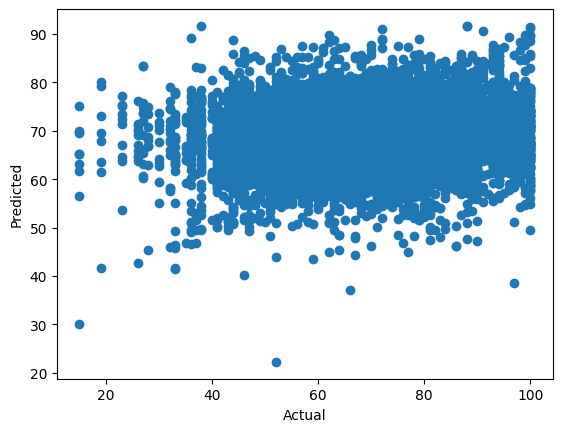

In [54]:
plt.scatter(y_test,y_pred_rgr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

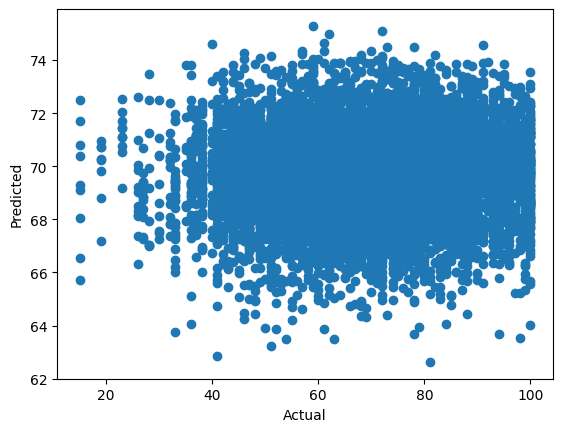

In [55]:
plt.scatter(y_test,y_pred_svr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

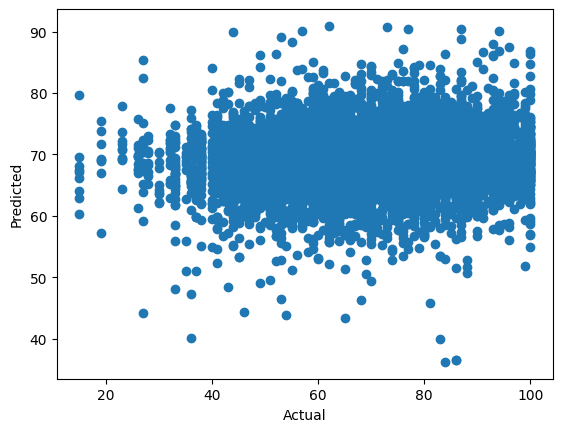

In [56]:
plt.scatter(y_test,y_pred_xgr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

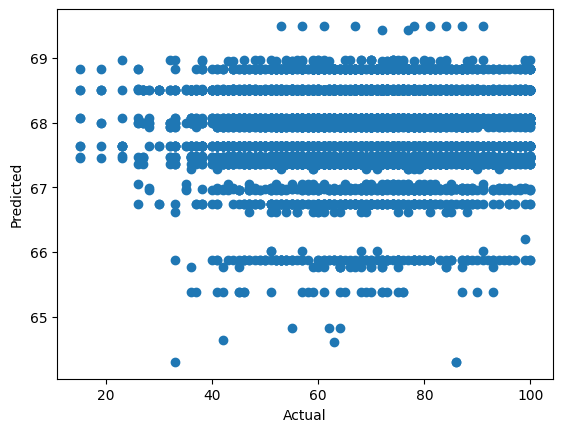

In [57]:
plt.scatter(y_test,y_pred_adr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred_rfc = rfc.predict(X_test)
print(evaluate_model(y_test, y_pred_rfc))



mean_absolute_error: 15.785416666666666 
mean_squared_error: 415.1660984848485 
root_mean_squared_error: 20.37562510660344 
r2_square: -0.8623616535479666 


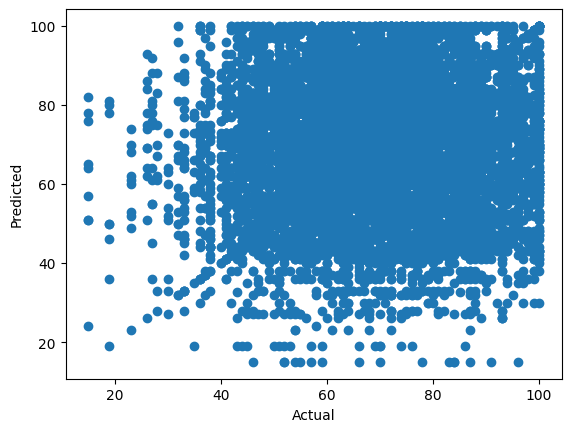

In [62]:
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train) # Make predictions 
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(model_name)
    model_list.append(model_name) 
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n')

Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 15.0370
- Mean Squared Error: 226.1115
- Mean Absolute Error: 12.1276
- R2 Score: 0.0015
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9216
- Mean Squared Error: 14.9216
- Mean Absolute Error: 12.0702
- R2 Score: 0.0012


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 15.0483
- Mean Squared Error: 226.4506
- Mean Absolute Error: 12.1443
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9315
- Mean Squared Error: 14.9315
- Mean Absolute Error: 12.0871
- R2 Score: -0.0001


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 13.7383
- Mean Squared Error: 188.7403
- Mean Absolute Error: 11.0123
- R2 Score: 0.1665
---------------------------------

C:\Users\nagap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:23:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "depth", "iterations" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor
Best hyperparameters: {'depth': 6, 'iterations': 30, 'learning_rate': 0.01}
Model performance for Training set
- Root Mean Squared Error: 14.8697
- Mean Squared Error: 221.1075
- Mean Absolute Error: 12.0009
- R2 Score: 0.0236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9219
- Mean Squared Error: 14.9219
- Mean Absolute Error: 12.0726
- R2 Score: 0.0012


AdaBoost Regressor
Best hyperparameters: {'learning_rate': 0.001, 'n_estimators': 64}
Model performance for Training set
- Root Mean Squared Error: 15.0256
- Mean Squared Error: 225.7696
- Mean Absolute Error: 12.1262
- R2 Score: 0.0030
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9200
- Mean Squared Error: 14.9200
- Mean Absolute Error: 12.0724
- R2 Score: 0.0014


